In [39]:
'''
假设你获取了250部电影的时长(列表a中),
希望统计出这些电影时长的分布状态(比如时长为100分钟到120分钟电影的数量,出现的频率)等信息,
你应该如何呈现这些数据?

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,
119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128,
115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,
86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,
99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107,
129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,
138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143,
115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116,
131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100,
154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149,
122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121,
114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106,
144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,
83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]
'''

'\n假设你获取了250部电影的时长(列表a中),\n希望统计出这些电影时长的分布状态(比如时长为100分钟到120分钟电影的数量,出现的频率)等信息,\n你应该如何呈现这些数据?\n\na=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,\n119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128,\n115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,\n86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,\n99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107,\n129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,\n138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143,\n115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116,\n131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100,\n154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149,\n122, 122, 110, 118, 127, 121, 114, 125, 126

16 156 78 78


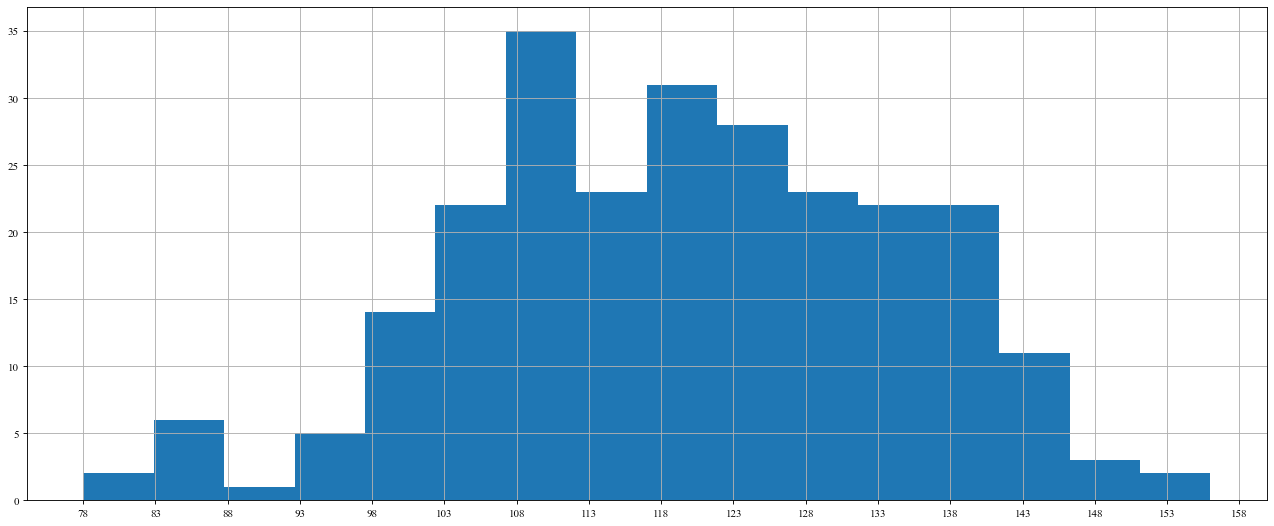

'\n网格和直方图没有对齐的原因：\nnum_bins算出来是16，因为无法整除，所以hist方法真正的bin_width就不是我设定的5了，而是(max(a)-min(a))/16 = 4.875\n(hist方法的组距和我定义的bin_width没有关系，当bin_width = 3时可以对其只是碰巧相等)\n'

In [45]:
from matplotlib import pyplot as plt
import math
import matplotlib as mat

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114,
119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128,
115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,
86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,
99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107,
129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125,
138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143,
115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116,
131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100,
154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149,
122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121,
114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106,
144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,
83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

mat.rcParams["font.family"] = ["Times New Roman", "SimSun"]

plt.figure(figsize = (20, 8), dpi = 80)

#组数 = 极差/组距
bin_width = 5 #组距
#num_bins = (max(a)-min(a))/bin_width #这样是不对的，要取整，组数要是整数
#num_bins = (max(a)-min(a))//bin_width #这样向下取整也不是很建议，建议向上取整 math.ceil
num_bins = math.ceil((max(a)-min(a))/bin_width)

#print(num_bins, max(a), min(a) ,max(a)-min(a))

#hist用来画直方图，num_bins是组数
plt.hist(a, num_bins)

plt.xticks(range(min(a), max(a)+bin_width, bin_width))
plt.yticks()
plt.grid()
plt.show()

'''
网格和直方图没有对齐的原因：
num_bins算出来是16，因为无法整除，所以hist方法真正的bin_width就不是我设定的5了，而是(max(a)-min(a))/16 = 4.875
(hist方法的组距和我定义的bin_width没有关系，当bin_width = 3时可以对其只是碰巧相等)
'''

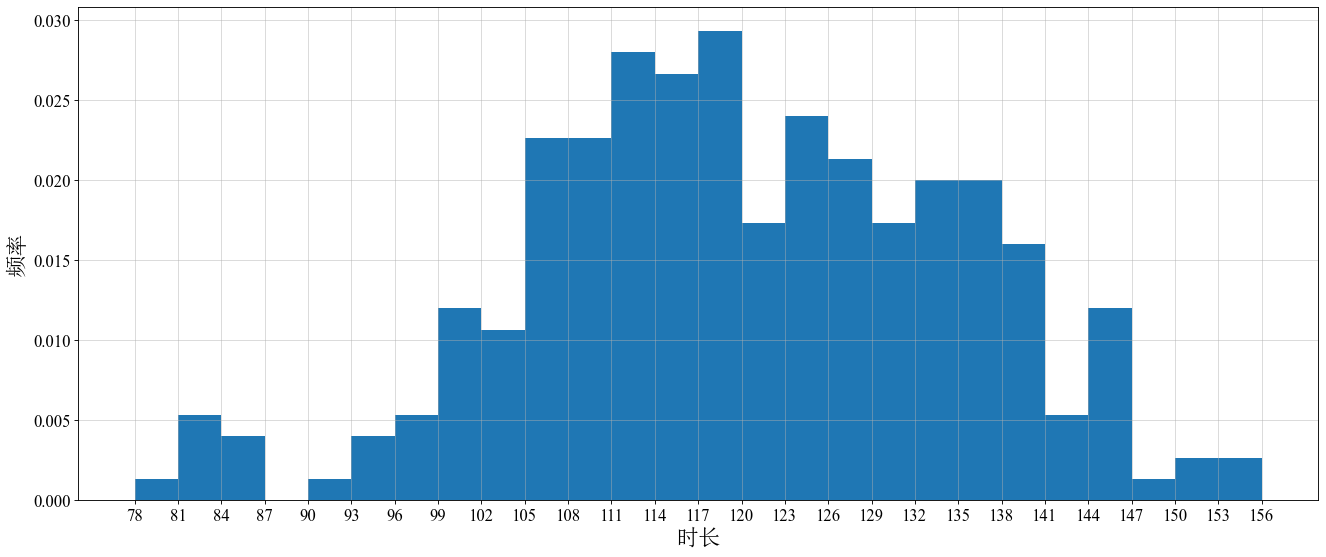

In [85]:
import numpy as np

plt.figure(figsize = (20, 8), dpi = 80)
#设置density = True可以改为频率分布直方图
plt.hist(a, num_bins, density = True)

#改变range的步长使其对齐
#plt.xticks(range(min(a), max(a)+bin_width, (max(a)-min(a))/num_bins)) #当然这样也是错误的，因为range()用来生成整数序列，可以用 numpy.arange()
plt.xticks(np.arange(min(a), max(a)+(max(a)-min(a))/num_bins, (max(a)-min(a))/num_bins), fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("时长", fontsize = 20)
#plt.ylabel("频数", fontsize = 20)
plt.ylabel("频率", fontsize = 20)
plt.grid(alpha = 0.5)
plt.show()